In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, poisson, norm
import statistics
# import pandas as pd
#from math import exp
# import random

# Problem 1 - Poisson spike trains

In [16]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark', font_scale = 1.5)

## (a)
In many neurons of the brain, the omission of individual spikes appears to occur almost at
random, similar to the clicks in a Geiger counter. We will therefore start by creating some artificial,
random spike trains. We will quantify such a spike train as a series of 0s (no spikes) and 1s (spike).
To begin, create a vector of 1000 elements so that, on average but in the most irregular manner, every
fourth element in the vector is a spike. Plot the vector, by using one dot for each spike, for example,
or the matplotlib function ’eventplot’

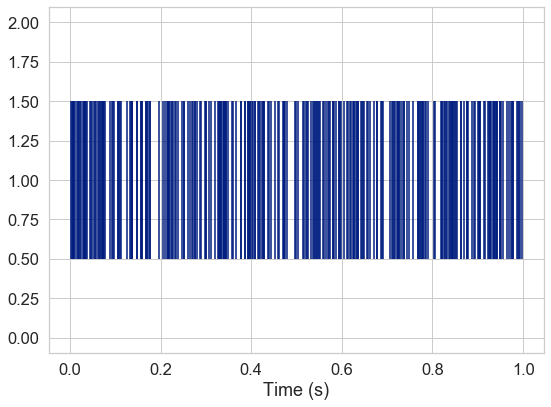

286

In [17]:
spks = np.random.choice([0, 1], size=(1000,), p=[0.75, 0.25])
time = np.linspace(0,1, len(spks)) # unit in s
plt.eventplot(time[spks == 1])
plt.xlabel('Time (s)')
plt.savefig('fig1_p1_report3.png', dpi = 600)
plt.show()

np.sum(spks)

## (b)
 In the next step, we want to introduce time units. We will associate every 0 or 1 with a time
bin of length $∆t$ msec. Choose $∆t = 2$ msec and create a spike train of length 1 sec with an average
rate of 25 spikes/sec. (Careful with the units!) Plot the spike train similar to above, but now use the
correct time axis.

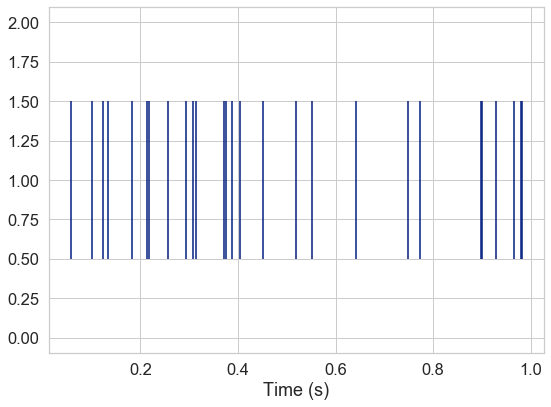

27

In [18]:
delta_t = 2 #unit in ms
spks = np.random.choice([0, 1], size=(int(1000/delta_t),), p=[0.95, 0.05])
time = np.linspace(0,1, len(spks)) # unit in s
plt.eventplot(time[spks == 1])
plt.xlabel('Time (s)')
plt.savefig('fig2_p1_report3.png', dpi = 600)
plt.show()
np.sum(spks)

## (c)
Generate N = 200 spike trains with firing rate 25 Hz and count the total number of spikes in
each of them. Plot 50 of these trials as a rastergram. Plot a histogram of the spike counts


25.09


c:\users\nicolas bruno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


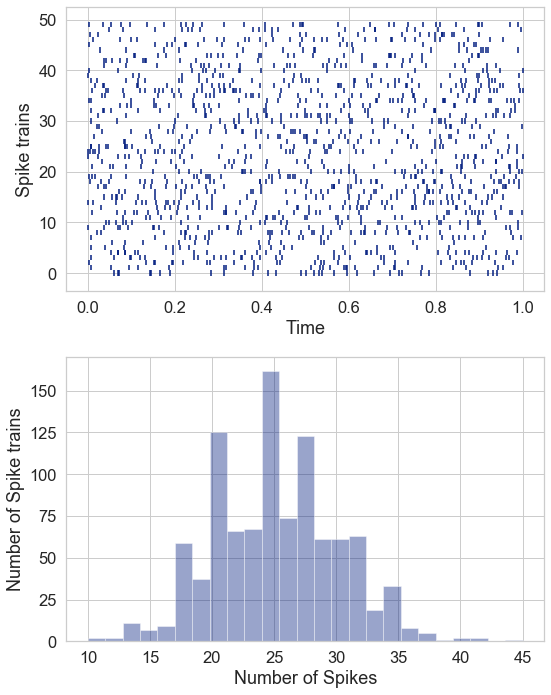

In [24]:
spk_trains1 = np.random.choice([0, 1], size=(int(1000/delta_t),), p=[0.95, 0.05])
time = np.linspace(0,1, len(spk_trains1))

time_spk1 = [time[spk_trains1==1]]


for i in range(1, 1000):
    spk_i = np.random.choice([0, 1],  size=(int(1000/delta_t), ), p=[0.95, 0.05])
    spk_trains1 = np.vstack((spk_trains1,spk_i))
    time_spk1.append(time[spk_i!=0])

fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 10))

ax1.eventplot(time_spk1[0:50], )
ax1.set_xlabel('Time')
ax1.set_ylabel('Spike trains')

sum_spks = np.sum(spk_trains1, axis = 1)
print(np.mean(sum_spks))
sns.distplot(sum_spks, bins = 25, kde = False, norm_hist = False, ax = ax2)
ax2.set_xlabel('Number of Spikes')
ax2.set_ylabel('Number of Spike trains')
fig.savefig('fig3_p1_report3.png', dpi = 600)
fig.show()

# (d) Advanced
Compute the histogram of interspike intervals for the above spike trains. Verify that the histogram of spike counts follows a normal distribution (why) and the histogram of interspike intervals an exponential distribution.


In [20]:
intervals = []
count = 0
for i in spk_trains1:
  for j in i:
    if j == 0:
      count +=1
    else:
      intervals.append(count)
      count = 0

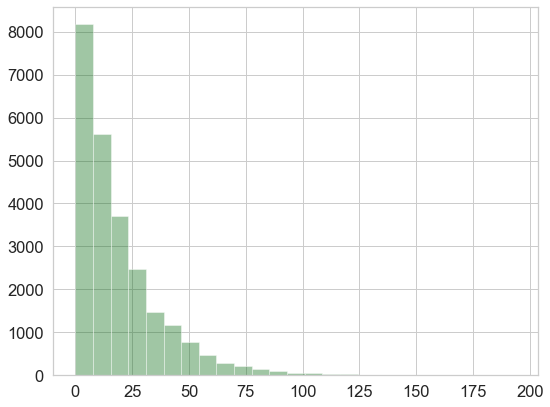

In [21]:
sns.distplot(intervals, 25, kde= False, color = 'g')
plt.show()

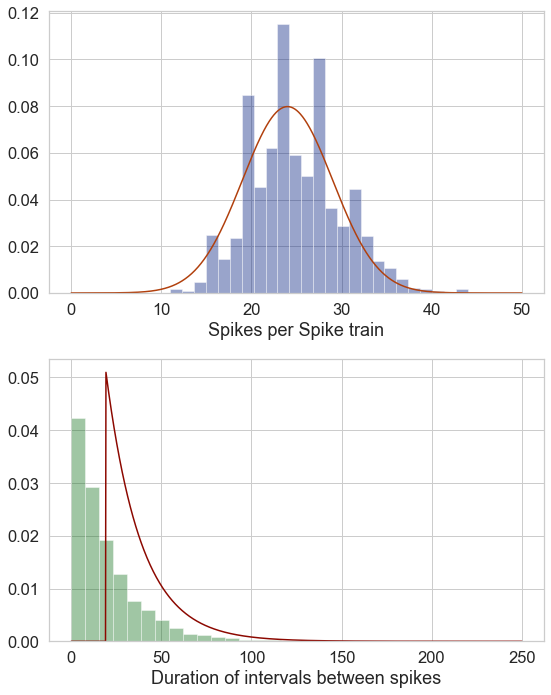

In [23]:
fig, (ax1,ax2) = plt.subplots(2,figsize = (8, 10))
mu =  statistics.mean(sum_spks)
sigma = statistics.stdev(sum_spks)
x = np.linspace(0,50, 1000)
y = norm.pdf(x,  mu, sigma)
sns.distplot(sum_spks, bins = 25, kde = False, norm_hist = True, ax = ax1)
ax1.plot(x, y)
ax1.set_xlabel('Spikes per Spike train')

mu =  statistics.mean(intervals)
sigma = statistics.stdev(intervals)
x = np.linspace(0,250, 1000)
y = expon.pdf(x, mu, sigma)
ax2.plot(x, y, 'r')
sns.distplot(intervals, 25, kde = False, norm_hist = True, color = 'g', ax = ax2)
ax2.set_xlabel('Duration of intervals between spikes')

fig.savefig('fig4_p1_report3.png', dpi = 600)

